<h2>OBSERVATIONAL ASTROPHYSICS – FALL 2019 Reduction Exercise: Part 3</h2>

In this part you will take all of your images in a given band and align them using a program called "astroalign"

We will be aligning images with the http://toros-astro.github.io/astroalign/ package

First, from within your python3 enviroment you will need to run "*conda install astroalign*" to install the package

In [1]:
import astroalign as aa
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib inline
from astropy.io import fits

A function that takes an source image name, a target image name to which the source will be transformed, and an output file name.  The output file will be the source image transformed to match the target image.

In [9]:

def im_trans(filesource,filetarg,fileout):
    #filesource is the file that you want to be transformed
    #filetarg is the file that you want to transform the first file to
    #fileout is the output file that has been transformed

    redpath = "/home/b739c775/RFSLAB/USER_DPT/b739c775/ASTR596/Data/Flatcorrected/"
    mypath = "/home/b739c775/Documents/astro596/astr596_obsproject-master2/astr596_obsproject-master/Images/"
    imgfilesource = redpath + filesource
    imgfiletarg = mypath + filetarg
    print(imgfilesource)

    #read in the source file and target file, splitting the file into a data and header component
    imgsource, hdrsource = fits.getdata(imgfilesource, header=True)
    imgtarg, hdrtarg = fits.getdata(imgfiletarg, header=True)

    #run the alignment tool.
    imgsource_aligned, footprint = aa.register(imgsource, imgtarg)

    #write out the transformed file
    imtransname = mypath + fileout
    fits.writeto(imtransname, imgsource_aligned, header=hdrsource, overwrite=True)

    #find the transformation
    p, (pos_imgsource, pos_imgsource_aligned) = aa.find_transform(imgsource, imgtarg)
                            
    #print out the transformation
    #******check that the output makes sense for each target
    print("Rotation: {:.2f} degrees".format(p.rotation * 180.0 / np.pi))
    print("\nScale factor: {:.2f}".format(p.scale))
    print("\nTranslation: (x, y) = ({:.2f}, {:.2f})".format(*p.translation))
    
    #plot the stars found in common in each plot
    fig, axes = plt.subplots(2, 2, figsize=(10, 10))

    colors = ['r', 'g', 'b', 'y', 'cyan', 'w', 'm']

    axes[0, 0].imshow(imgsource, cmap='gray', interpolation='none', origin='lower',vmin = 250, vmax = 1000)
    axes[0, 0].axis('off')
    axes[0, 0].set_title("Source Image")
    for (xp, yp), c in zip(pos_imgsource[:len(colors)], colors):
        circ = plt.Circle((xp, yp), 4, fill=False, edgecolor=c, linewidth=5)
        axes[0, 0].add_patch(circ)

    axes[0, 1].imshow(imgtarg, cmap='gray', interpolation='none', origin='lower',vmin = 250, vmax = 1000)
    axes[0, 1].axis('off')
    axes[0, 1].set_title("Target Image")
    for (xp, yp), c in zip(pos_imgsource_aligned[:len(colors)], colors):
        circ = plt.Circle((xp, yp), 4 * p.scale, fill=False, edgecolor=c, linewidth=5)
        axes[0, 1].add_patch(circ)

    axes[1, 1].imshow(imgsource_aligned, cmap='gray', interpolation='none', origin='lower',vmin = 250, vmax = 1000)
    axes[1, 1].axis('off')
    axes[1, 1].set_title("Source Image aligned with Target")
    for (xp, yp), c in zip(pos_imgsource_aligned[:len(colors)], colors):
        circ = plt.Circle((xp, yp), 4 * p.scale, fill=False, edgecolor=c, linewidth=5)
        axes[1, 1].add_patch(circ)

    axes[1, 0].axis('off')

    plt.tight_layout()
    plt.show()

Make a series of calls to this function that transform each of your images to the first image in that band for each target.  I give an example below.

/home/b739c775/RFSLAB/USER_DPT/b739c775/ASTR596/Data/Flatcorrected/s050_trbf.fits
Rotation: 0.00 degrees

Scale factor: 1.00

Translation: (x, y) = (0.00, -0.00)


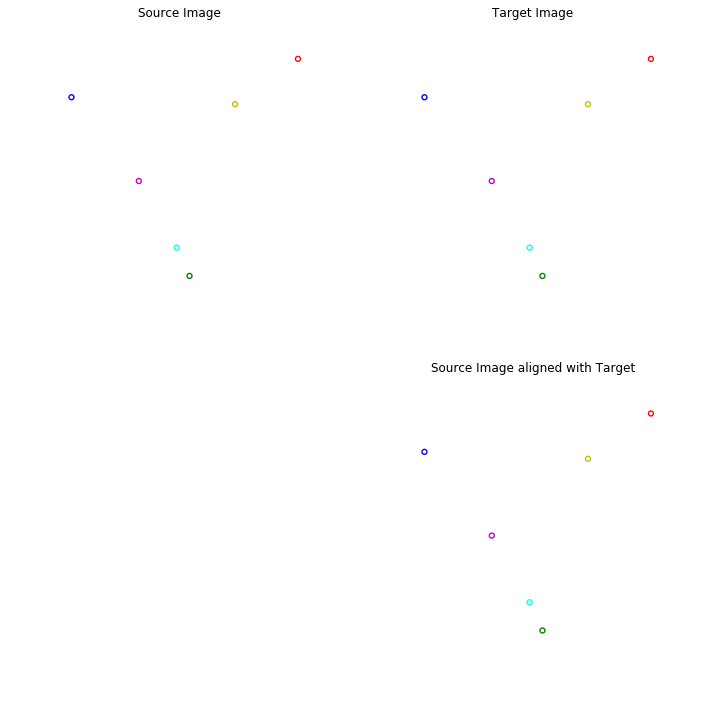

/home/b739c775/RFSLAB/USER_DPT/b739c775/ASTR596/Data/Flatcorrected/s051_trbf.fits


FileNotFoundError: [Errno 2] No such file or directory: '/home/b739c775/RFSLAB/USER_DPT/b739c775/ASTR596/Data/Flatcorrected/s051_trbfy.fits'

In [10]:
#***********
#nova R
im_trans("s050_trbf.fits","s050_trbf.fits","s050_trbfy.fits")
im_trans("s051_trbf.fits","s050_trbf.fits","s051_trbfy.fits")
im_trans("s052_trbf.fits","s050_trbf.fits","s052_trbfy.fits")

Now open the transformed images in ds9 in different and confirm that they are aligned by blinking the frames.

/home/b739c775/RFSLAB/USER_DPT/b739c775/ASTR596/Data/Flatcorrected/s056_trbf.fits
Rotation: 0.00 degrees

Scale factor: 1.00

Translation: (x, y) = (-0.00, -0.00)


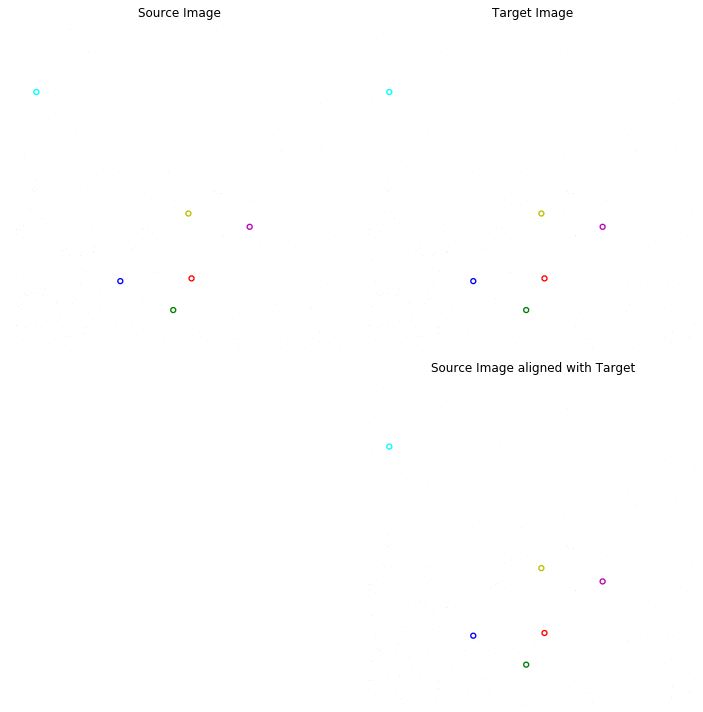

/home/b739c775/RFSLAB/USER_DPT/b739c775/ASTR596/Data/Flatcorrected/s057_trbf.fits
Rotation: -0.00 degrees

Scale factor: 1.00

Translation: (x, y) = (-2.82, 2.07)


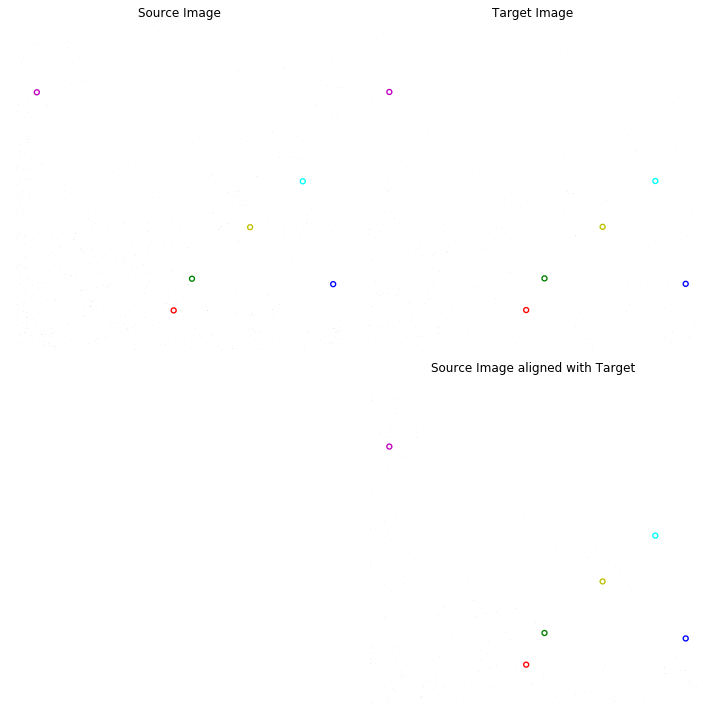

/home/b739c775/RFSLAB/USER_DPT/b739c775/ASTR596/Data/Flatcorrected/s058_trbf.fits
Rotation: 0.00 degrees

Scale factor: 1.00

Translation: (x, y) = (-6.28, 4.32)


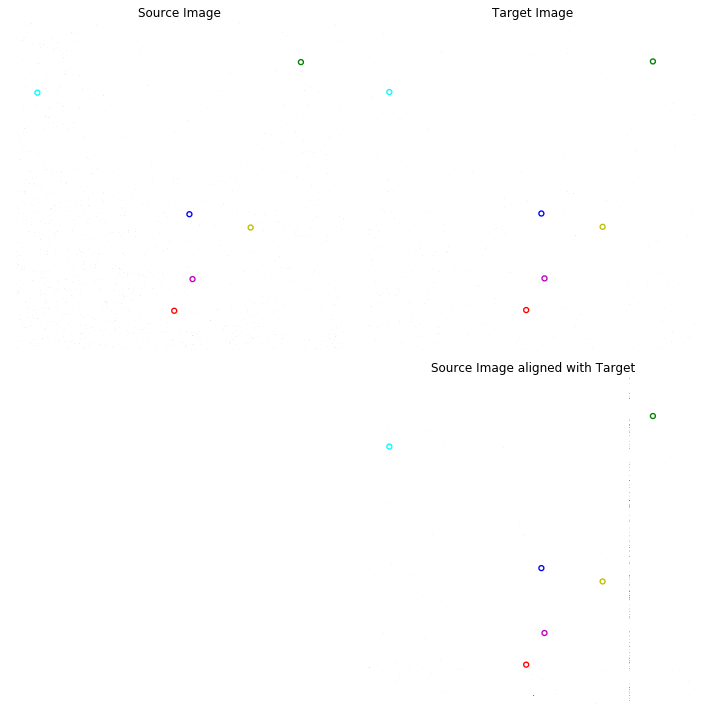

In [3]:
#***********
#nova B
im_trans("s056_trbf.fits","s056_trbf.fits","s056_trbfy.fits")
im_trans("s057_trbf.fits","s056_trbf.fits","s057_trbfy.fits")
im_trans("s058_trbf.fits","s056_trbf.fits","s058_trbfy.fits")

/home/b739c775/RFSLAB/USER_DPT/b739c775/ASTR596/Data/Flatcorrected/s053_trbf.fits
Rotation: 0.00 degrees

Scale factor: 1.00

Translation: (x, y) = (0.00, 0.00)


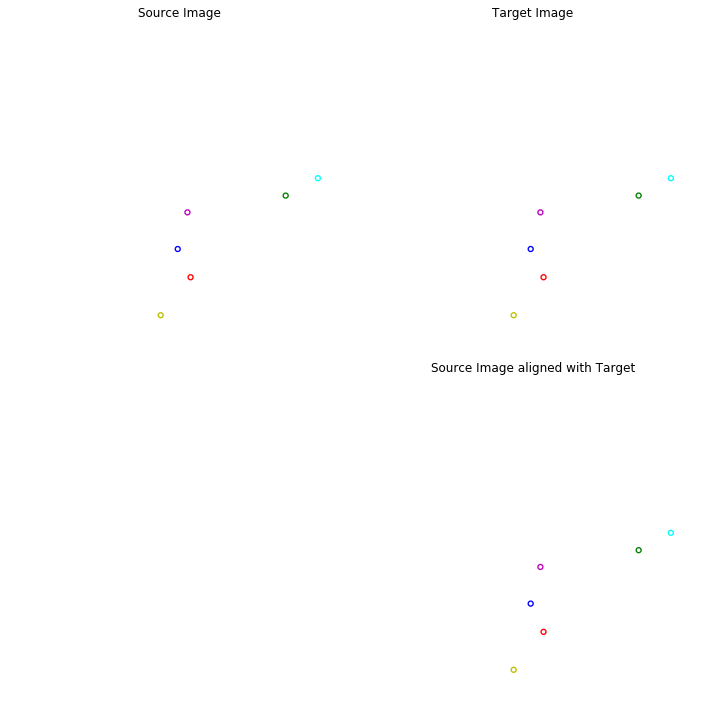

/home/b739c775/RFSLAB/USER_DPT/b739c775/ASTR596/Data/Flatcorrected/s054_trbf.fits
Rotation: 0.00 degrees

Scale factor: 1.00

Translation: (x, y) = (-1.30, 2.65)


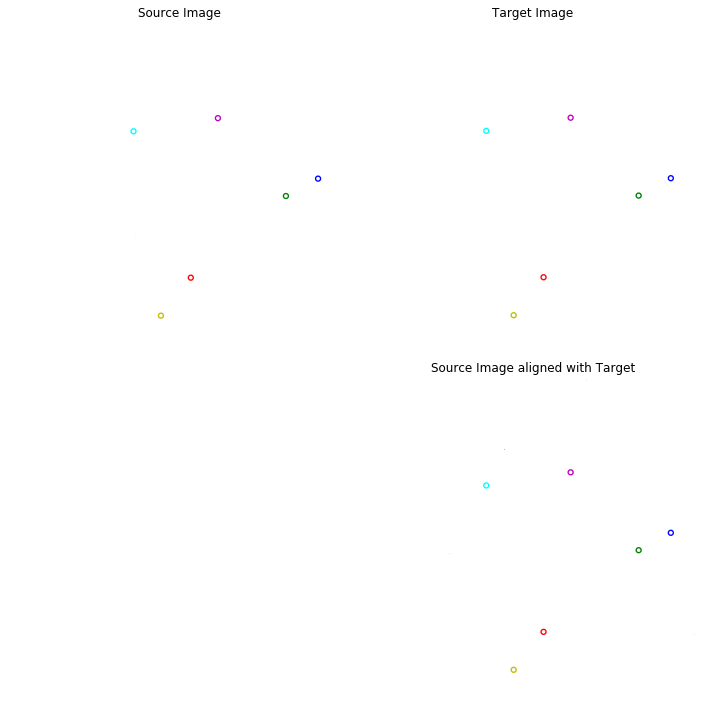

/home/b739c775/RFSLAB/USER_DPT/b739c775/ASTR596/Data/Flatcorrected/s055_trbf.fits
Rotation: 0.00 degrees

Scale factor: 1.00

Translation: (x, y) = (-3.03, 5.20)


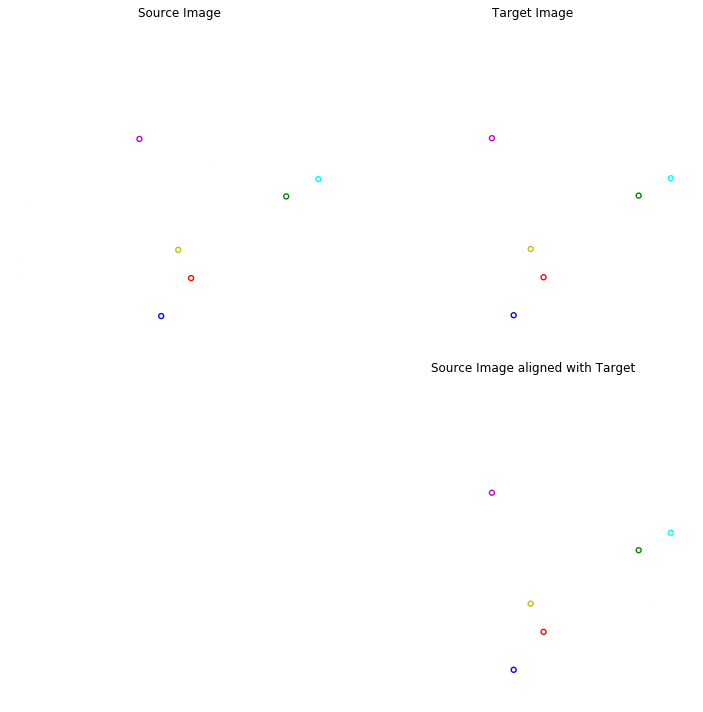

In [4]:
#***********
#nova V
im_trans("s053_trbf.fits","s053_trbf.fits","s053_trbfy.fits")
im_trans("s054_trbf.fits","s053_trbf.fits","s054_trbfy.fits")
im_trans("s055_trbf.fits","s053_trbf.fits","s055_trbfy.fits")

/home/b739c775/RFSLAB/USER_DPT/b739c775/ASTR596/Data/Flatcorrected/s064_trbf.fits
Rotation: 0.00 degrees

Scale factor: 1.00

Translation: (x, y) = (0.00, 0.00)


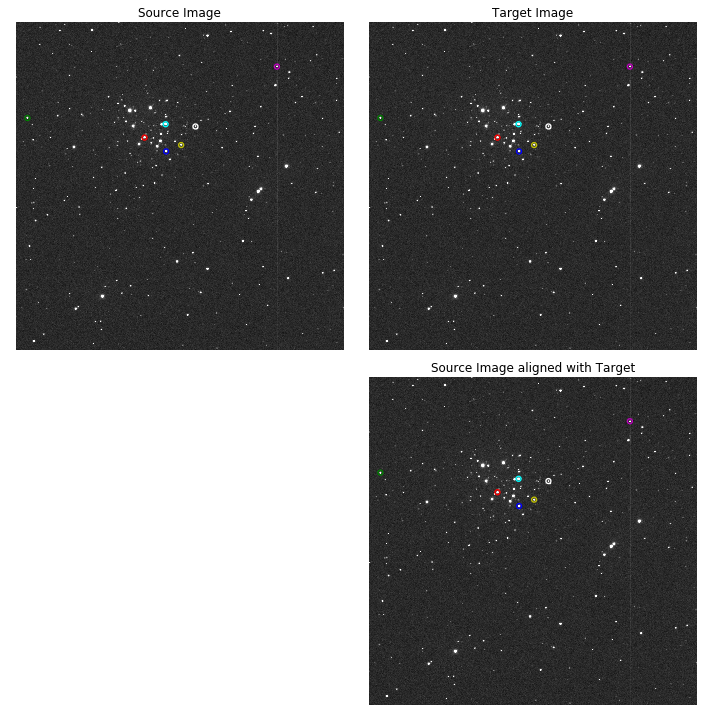

/home/b739c775/RFSLAB/USER_DPT/b739c775/ASTR596/Data/Flatcorrected/s065_trbf.fits
Rotation: 0.00 degrees

Scale factor: 1.00

Translation: (x, y) = (-31.28, -1.68)


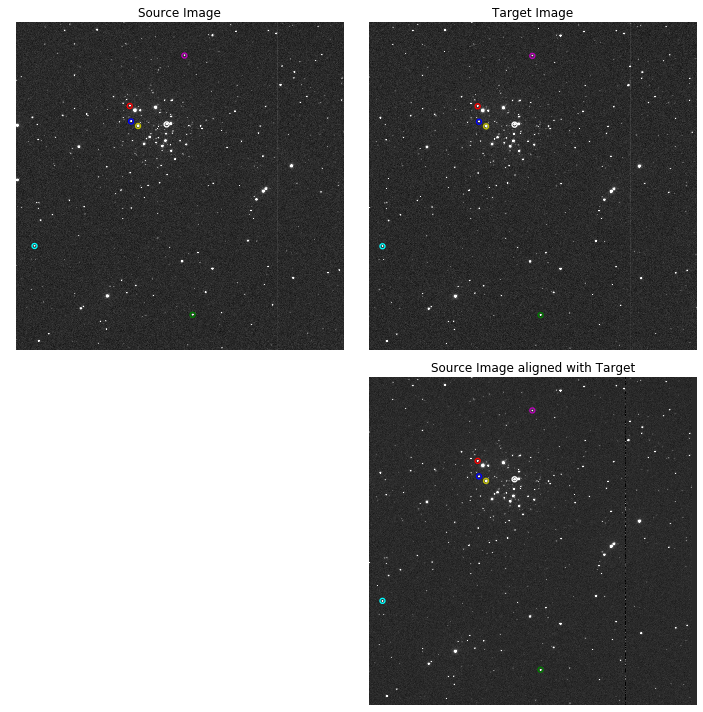

/home/b739c775/RFSLAB/USER_DPT/b739c775/ASTR596/Data/Flatcorrected/s066_trbf.fits
Rotation: 0.01 degrees

Scale factor: 1.00

Translation: (x, y) = (-66.09, -3.45)


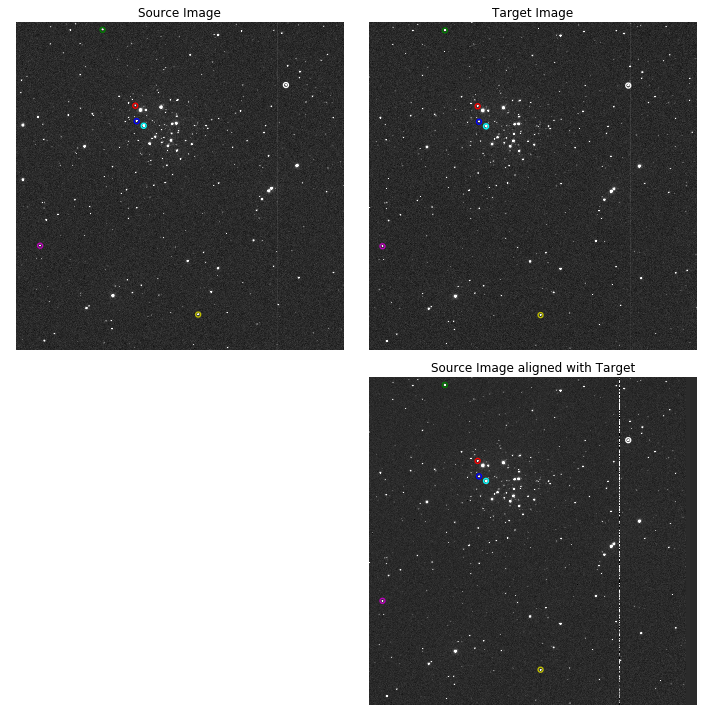

/home/b739c775/RFSLAB/USER_DPT/b739c775/ASTR596/Data/Flatcorrected/s067_trbf.fits
Rotation: 0.01 degrees

Scale factor: 1.00

Translation: (x, y) = (-101.50, -5.06)


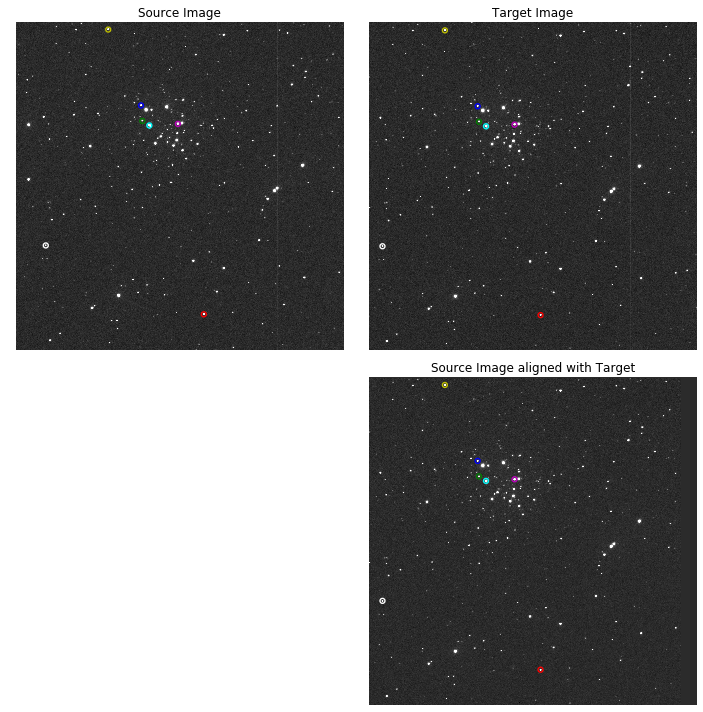

/home/b739c775/RFSLAB/USER_DPT/b739c775/ASTR596/Data/Flatcorrected/s068_trbf.fits
Rotation: 0.01 degrees

Scale factor: 1.00

Translation: (x, y) = (-133.67, -6.80)


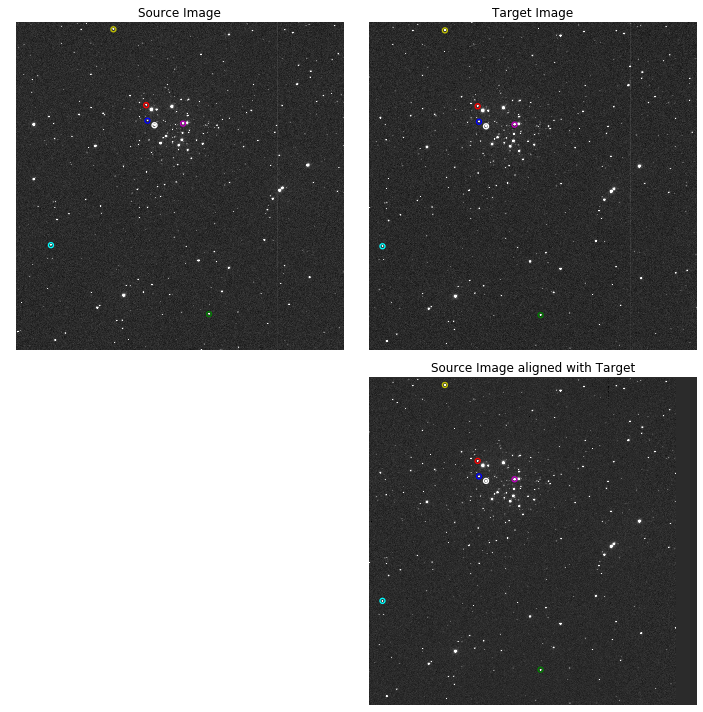

/home/b739c775/RFSLAB/USER_DPT/b739c775/ASTR596/Data/Flatcorrected/s069_trbf.fits
Rotation: 0.02 degrees

Scale factor: 1.00

Translation: (x, y) = (-165.70, -8.54)


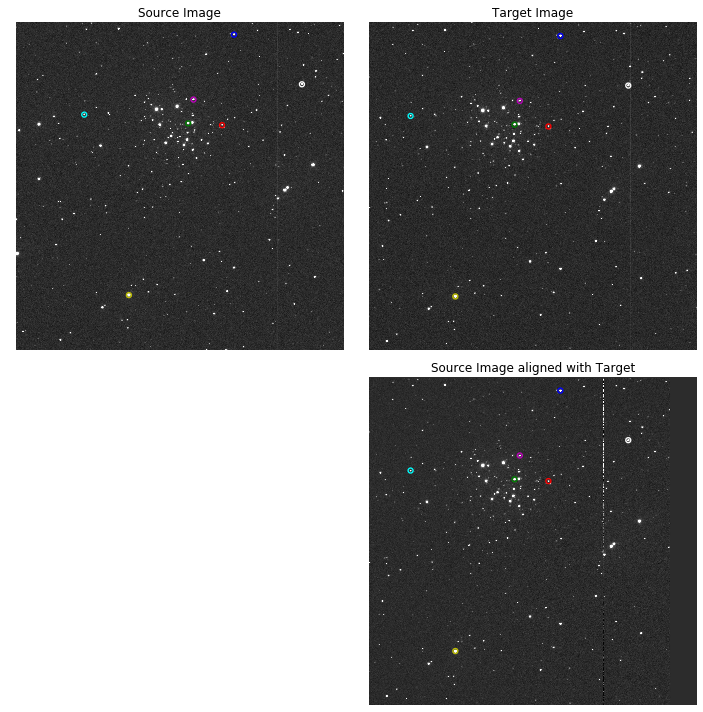

/home/b739c775/RFSLAB/USER_DPT/b739c775/ASTR596/Data/Flatcorrected/s070_trbf.fits
Rotation: 0.02 degrees

Scale factor: 1.00

Translation: (x, y) = (-199.75, -10.19)


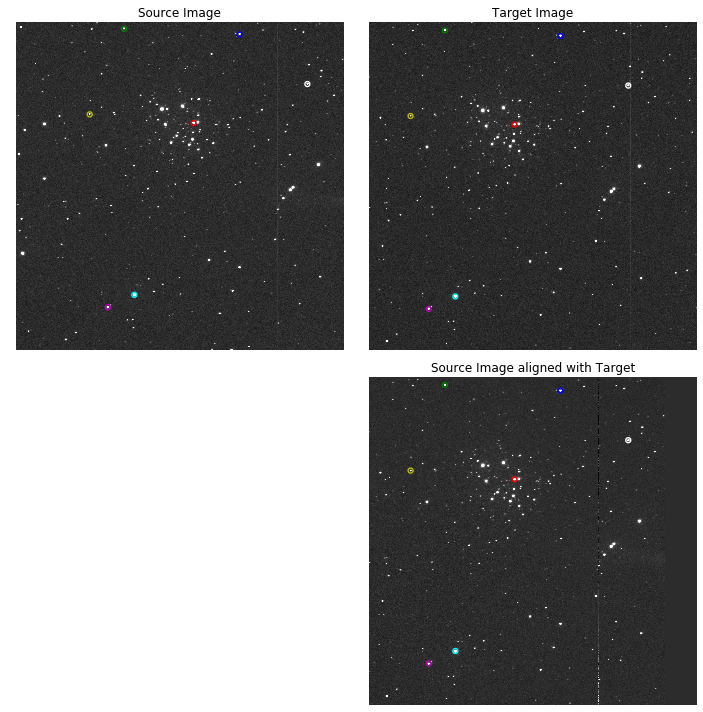

/home/b739c775/RFSLAB/USER_DPT/b739c775/ASTR596/Data/Flatcorrected/s071_trbf.fits
Rotation: 0.03 degrees

Scale factor: 1.00

Translation: (x, y) = (-232.89, -11.53)


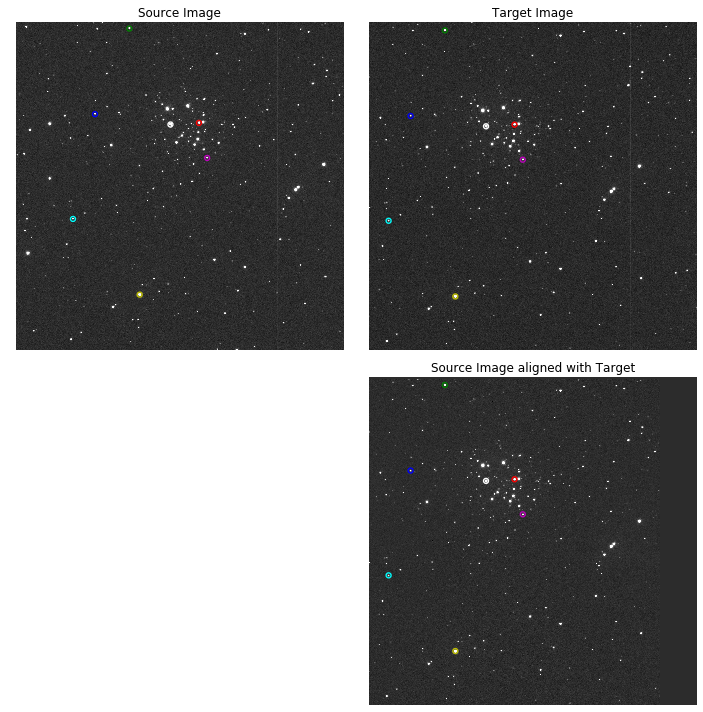

/home/b739c775/RFSLAB/USER_DPT/b739c775/ASTR596/Data/Flatcorrected/s072_trbf.fits
Rotation: 0.03 degrees

Scale factor: 1.00

Translation: (x, y) = (-262.18, -12.51)


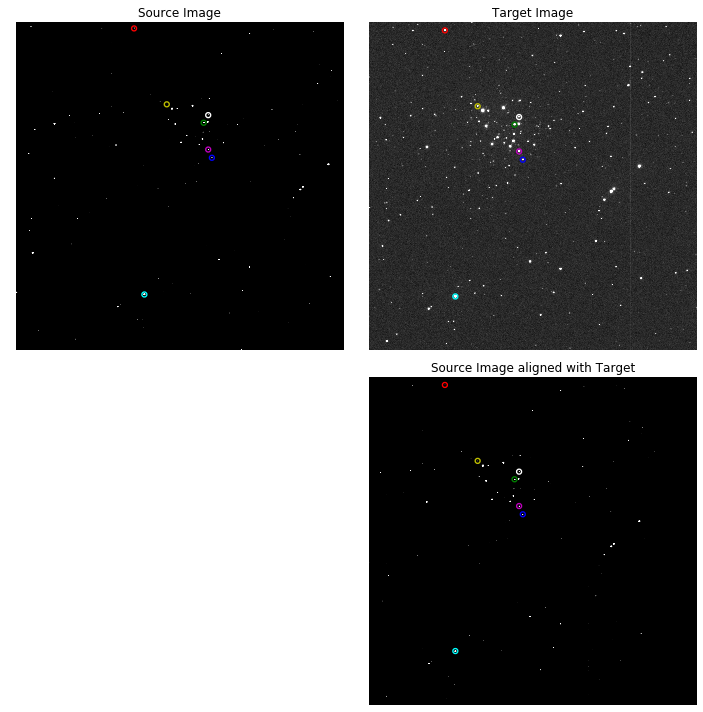

/home/b739c775/RFSLAB/USER_DPT/b739c775/ASTR596/Data/Flatcorrected/s073_trbf.fits
Rotation: 0.04 degrees

Scale factor: 1.00

Translation: (x, y) = (-294.34, -13.26)


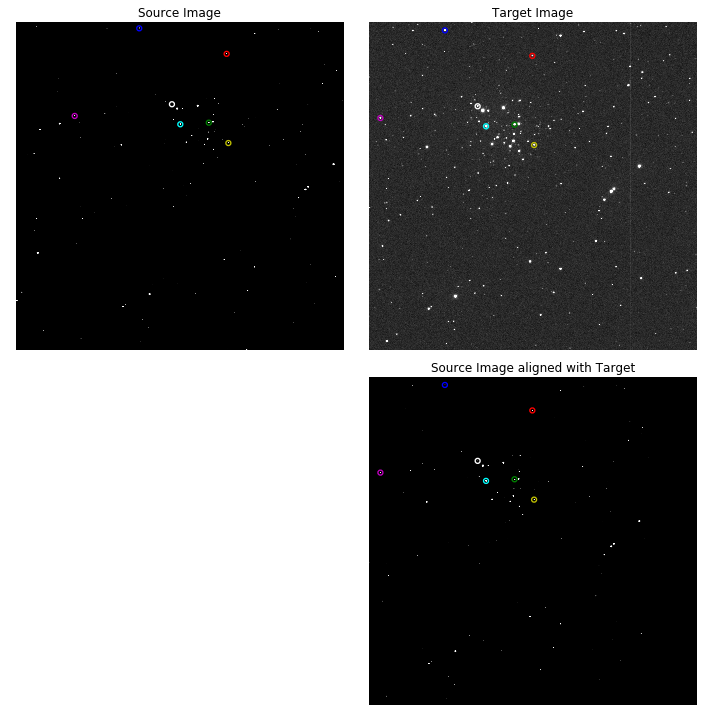

/home/b739c775/RFSLAB/USER_DPT/b739c775/ASTR596/Data/Flatcorrected/s074_trbf.fits
Rotation: 0.04 degrees

Scale factor: 1.00

Translation: (x, y) = (-325.06, -13.79)


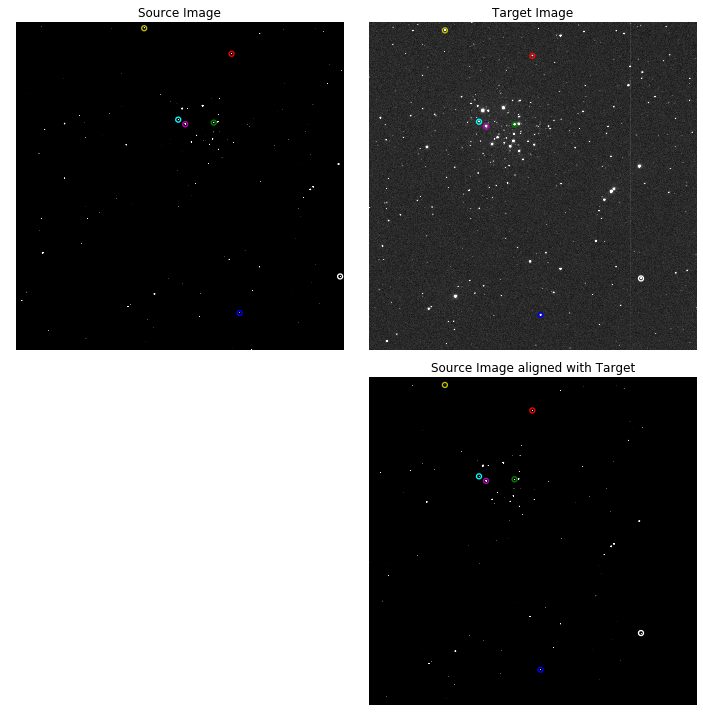

In [7]:
#***********
#NGC 7128 B
im_trans("s064_trbf.fits","s064_trbf.fits","s064_trbfy.fits")
im_trans("s065_trbf.fits","s064_trbf.fits","s065_trbfy.fits")
im_trans("s066_trbf.fits","s064_trbf.fits","s066_trbfy.fits")
im_trans("s067_trbf.fits","s064_trbf.fits","s067_trbfy.fits")
im_trans("s068_trbf.fits","s064_trbf.fits","s068_trbfy.fits")
im_trans("s069_trbf.fits","s064_trbf.fits","s069_trbfy.fits")
im_trans("s070_trbf.fits","s064_trbf.fits","s070_trbfy.fits")
im_trans("s071_trbf.fits","s064_trbf.fits","s071_trbfy.fits")
im_trans("s072_trbf.fits","s064_trbf.fits","s072_trbfy.fits")
im_trans("s073_trbf.fits","s064_trbf.fits","s073_trbfy.fits")
im_trans("s074_trbf.fits","s064_trbf.fits","s074_trbfy.fits")

/home/b739c775/RFSLAB/USER_DPT/b739c775/ASTR596/Data/Flatcorrected/s078_trbf.fits
Rotation: 0.00 degrees

Scale factor: 1.00

Translation: (x, y) = (-0.00, -0.00)


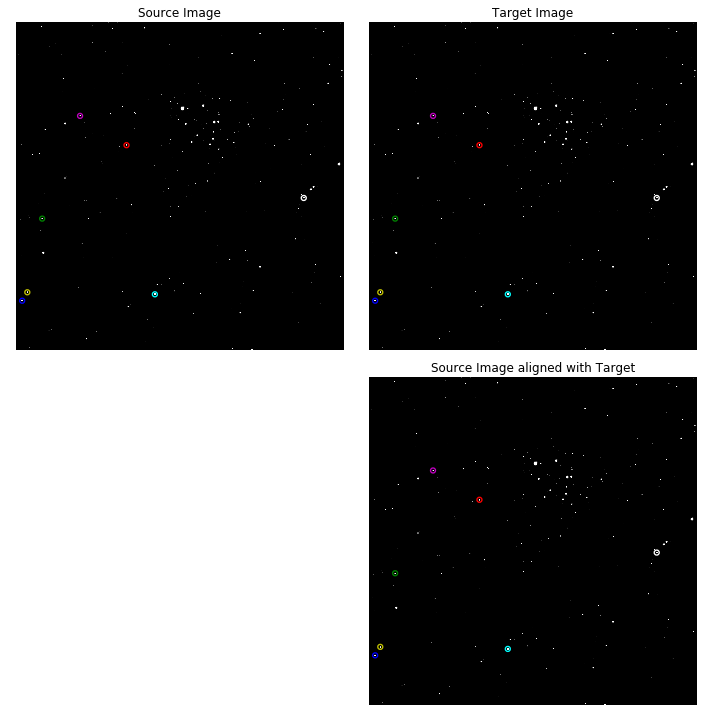

/home/b739c775/RFSLAB/USER_DPT/b739c775/ASTR596/Data/Flatcorrected/s079_trbf.fits
Rotation: -0.01 degrees

Scale factor: 1.00

Translation: (x, y) = (31.13, -0.85)


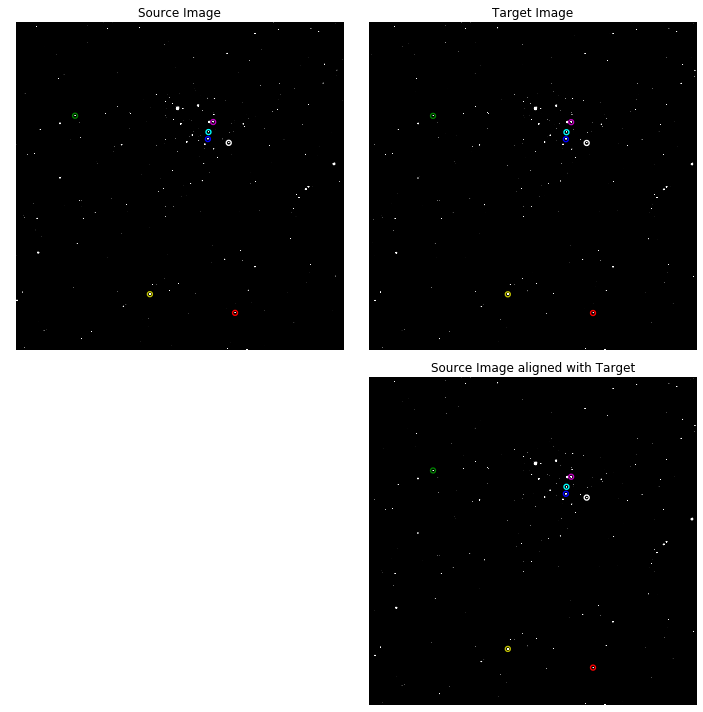

/home/b739c775/RFSLAB/USER_DPT/b739c775/ASTR596/Data/Flatcorrected/s080_trbf.fits
Rotation: -0.01 degrees

Scale factor: 1.00

Translation: (x, y) = (62.20, -1.55)


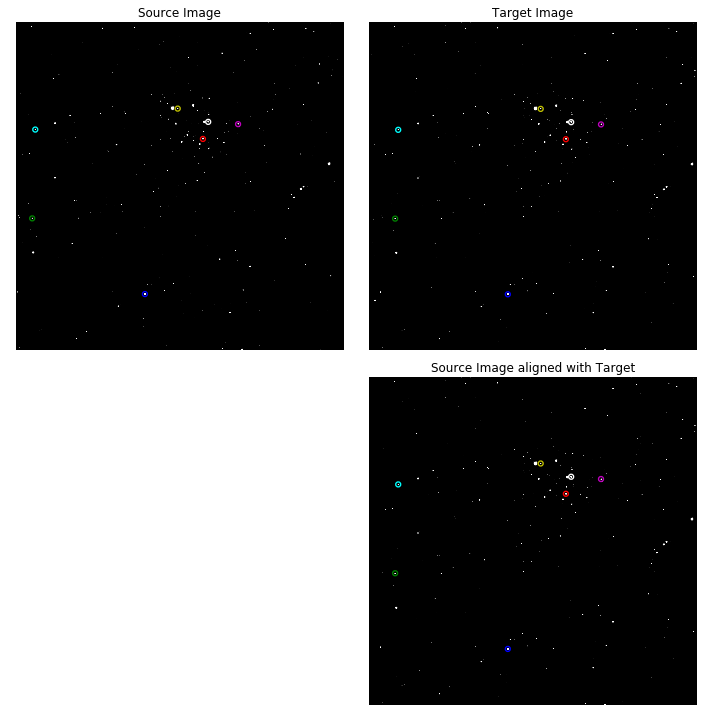

/home/b739c775/RFSLAB/USER_DPT/b739c775/ASTR596/Data/Flatcorrected/s081_trbf.fits
Rotation: -0.01 degrees

Scale factor: 1.00

Translation: (x, y) = (92.19, -2.58)


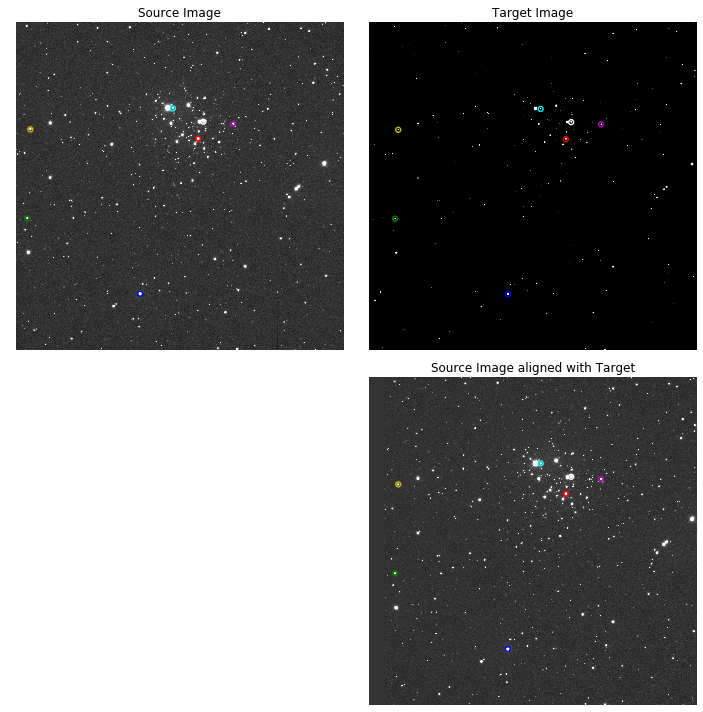

/home/b739c775/RFSLAB/USER_DPT/b739c775/ASTR596/Data/Flatcorrected/s082_trbf.fits
Rotation: -0.02 degrees

Scale factor: 1.00

Translation: (x, y) = (120.53, -4.36)


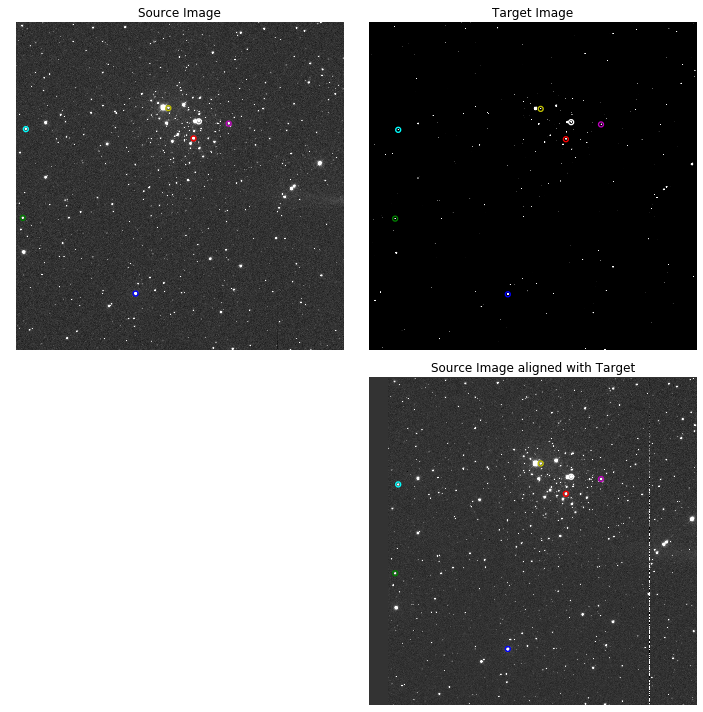

/home/b739c775/RFSLAB/USER_DPT/b739c775/ASTR596/Data/Flatcorrected/s083_trbf.fits
Rotation: -0.02 degrees

Scale factor: 1.00

Translation: (x, y) = (150.37, -6.35)


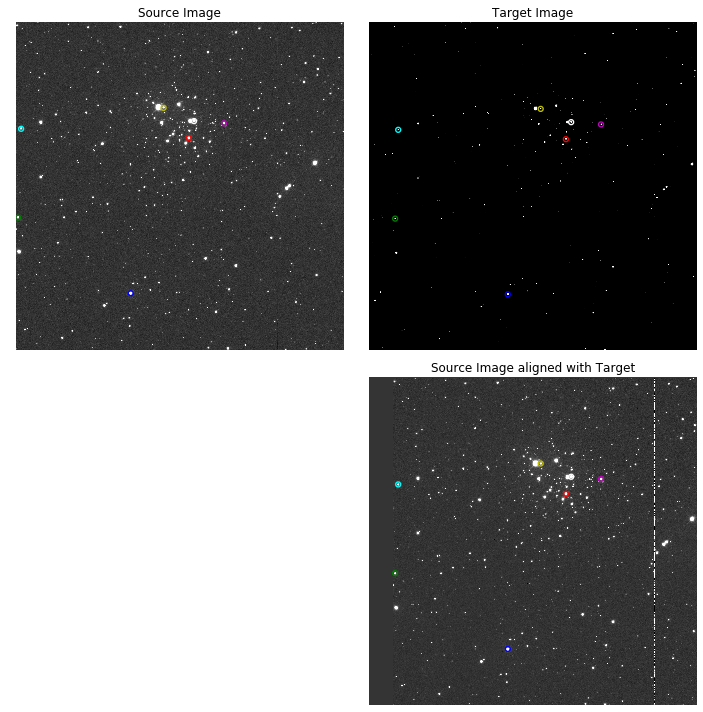

/home/b739c775/RFSLAB/USER_DPT/b739c775/ASTR596/Data/Flatcorrected/s084_trbf.fits
Rotation: -0.03 degrees

Scale factor: 1.00

Translation: (x, y) = (179.48, -7.48)


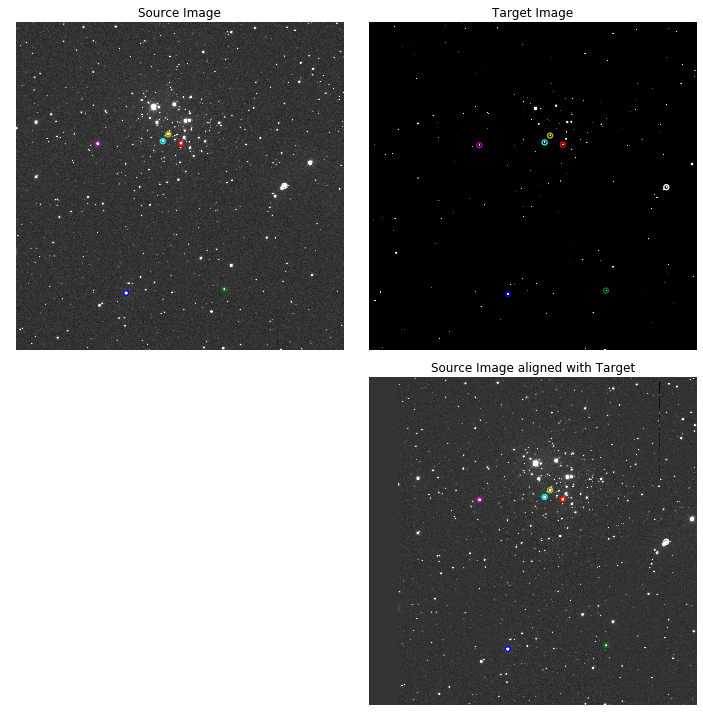

/home/b739c775/RFSLAB/USER_DPT/b739c775/ASTR596/Data/Flatcorrected/s085_trbf.fits
Rotation: -0.03 degrees

Scale factor: 1.00

Translation: (x, y) = (210.35, -9.00)


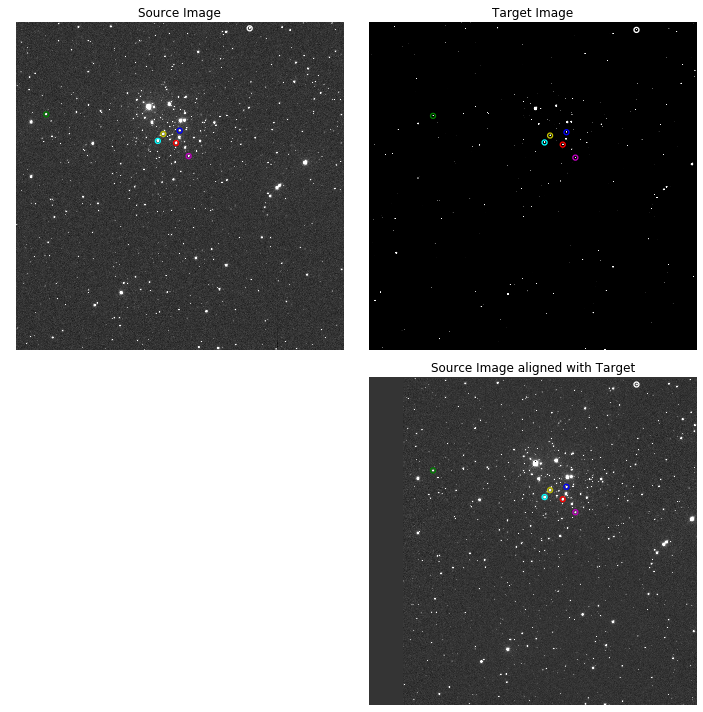

/home/b739c775/RFSLAB/USER_DPT/b739c775/ASTR596/Data/Flatcorrected/s086_trbf.fits
Rotation: -0.04 degrees

Scale factor: 1.00

Translation: (x, y) = (238.79, -10.45)


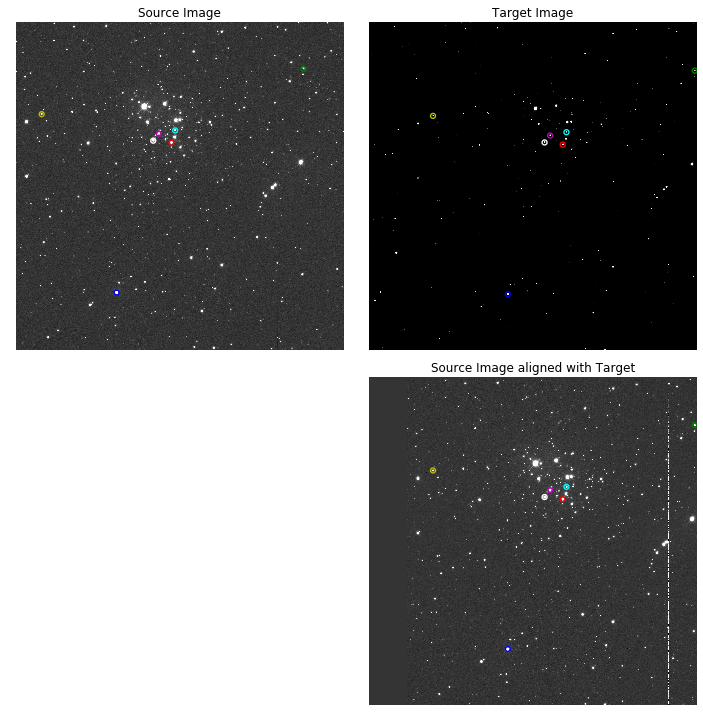

/home/b739c775/RFSLAB/USER_DPT/b739c775/ASTR596/Data/Flatcorrected/s087_trbf.fits
Rotation: -0.04 degrees

Scale factor: 1.00

Translation: (x, y) = (266.66, -11.71)


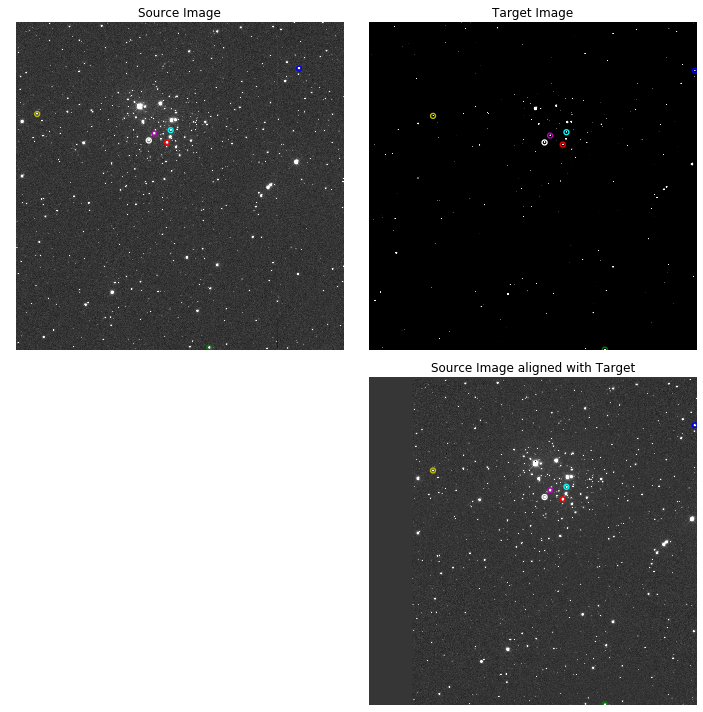

/home/b739c775/RFSLAB/USER_DPT/b739c775/ASTR596/Data/Flatcorrected/s088_trbf.fits
Rotation: -0.05 degrees

Scale factor: 1.00

Translation: (x, y) = (298.50, -13.60)


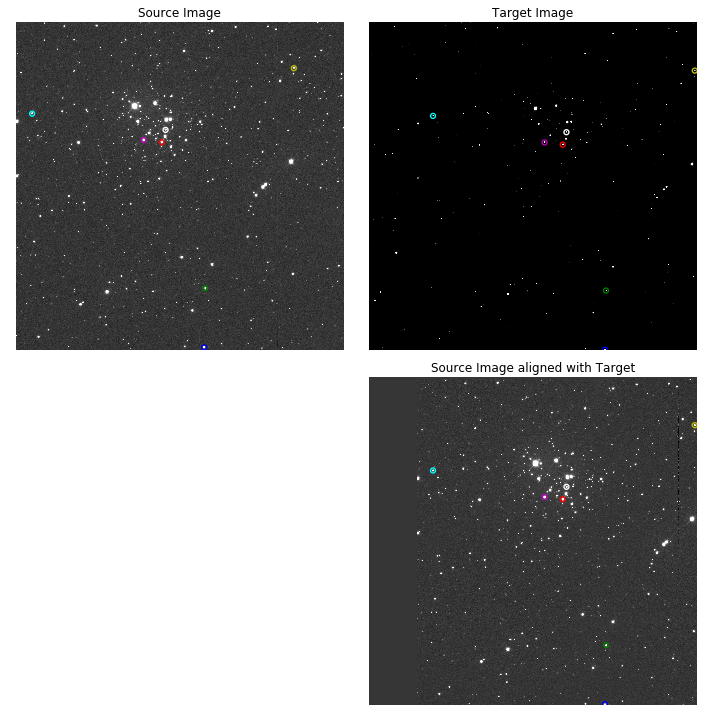

In [6]:
#***********
#NGC 7128 V
im_trans("s078_trbf.fits","s078_trbf.fits","s078_trbfy.fits")
im_trans("s079_trbf.fits","s078_trbf.fits","s079_trbfy.fits")
im_trans("s080_trbf.fits","s078_trbf.fits","s080_trbfy.fits")
im_trans("s081_trbf.fits","s078_trbf.fits","s081_trbfy.fits")
im_trans("s082_trbf.fits","s078_trbf.fits","s082_trbfy.fits")
im_trans("s083_trbf.fits","s078_trbf.fits","s083_trbfy.fits")
im_trans("s084_trbf.fits","s078_trbf.fits","s084_trbfy.fits")
im_trans("s085_trbf.fits","s078_trbf.fits","s085_trbfy.fits")
im_trans("s086_trbf.fits","s078_trbf.fits","s086_trbfy.fits")
im_trans("s087_trbf.fits","s078_trbf.fits","s087_trbfy.fits")
im_trans("s088_trbf.fits","s078_trbf.fits","s088_trbfy.fits")